# Import Packages

In [115]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load data

In [116]:
df = pd.read_csv('../data/bank-full.csv')

In [117]:
#shape 
df.shape

(41188, 21)

In [118]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Check data

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [120]:
# pdays 999 is empty
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

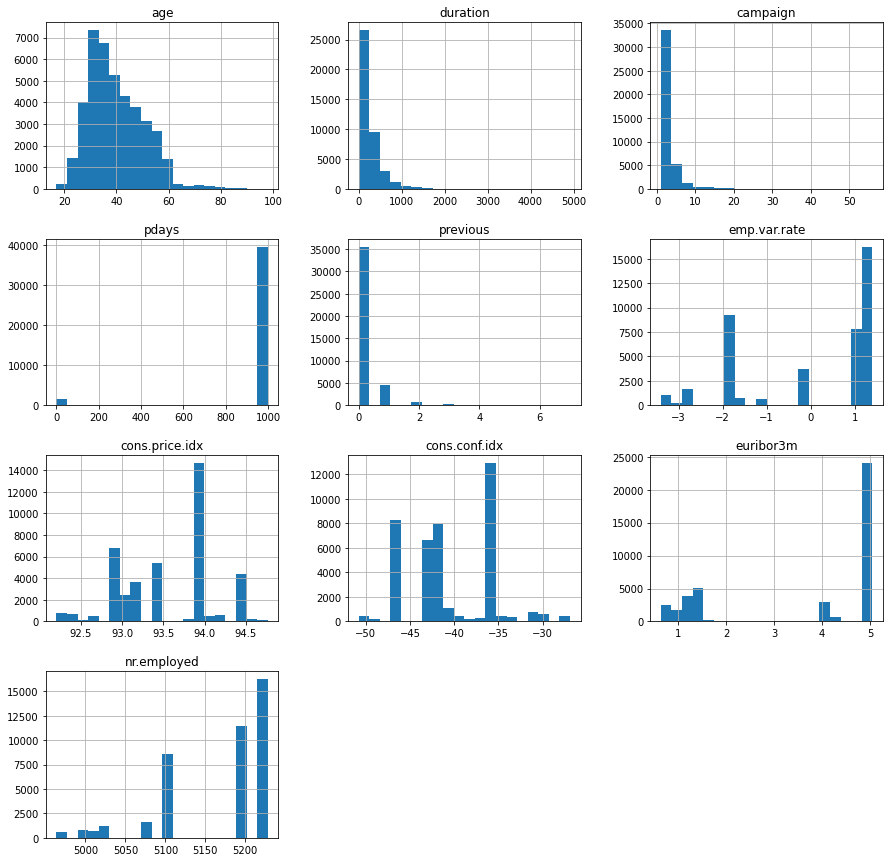

In [121]:
df.hist(
    figsize=(15,15),
    layout=(4,3),
    bins=20
    )

###  Categorical variables

In [122]:
for col in df.select_dtypes(include='object'):
    print(f'\nColumn name: {col}')
    print(df[col].value_counts())


Column name: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Column name: marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Column name: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Column name: default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Column name: housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Column name: loan
no         33950
yes         6248
unknown      990
Na

In [123]:
# special encode for day_of_week,month

In [124]:
day_of_week={'wed': 3, 'tue': 2, 'mon': 1, 'fri': 5, 'thu': 4,'sat':6,'sun':7}
month={"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, 
        "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
        "nov": 11, "dec": 12}

In [125]:
df.month = df.month.map(lambda x: month[x])
df.day_of_week = df.day_of_week.map(lambda x: day_of_week[x])

In [126]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Duplicated

In [127]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,7,1,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,7,4,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,8,1,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,8,2,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,11,2,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,4,2,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,5,5,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [128]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [129]:
subset = ['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'contact','duration', 'campaign']
df[df.duplicated(subset=subset)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1179,44,technician,married,professional.course,unknown,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4030,32,admin.,married,high.school,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4348,45,blue-collar,married,basic.9y,unknown,no,no,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
5581,45,blue-collar,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40110,33,admin.,single,university.degree,no,yes,no,cellular,7,1,...,1,999,1,failure,-1.7,94.215,-40.3,0.827,4991.6,no
40114,73,retired,married,basic.4y,no,yes,no,cellular,7,2,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.835,4991.6,yes
40248,29,admin.,single,university.degree,no,yes,no,cellular,7,1,...,2,999,1,failure,-1.7,94.215,-40.3,0.889,4991.6,no
40264,32,admin.,single,university.degree,no,yes,no,cellular,7,2,...,1,999,1,failure,-1.7,94.215,-40.3,0.893,4991.6,no


In [130]:
#drop duplicates
df = df.drop_duplicates(subset = subset)

## EDA

### Job

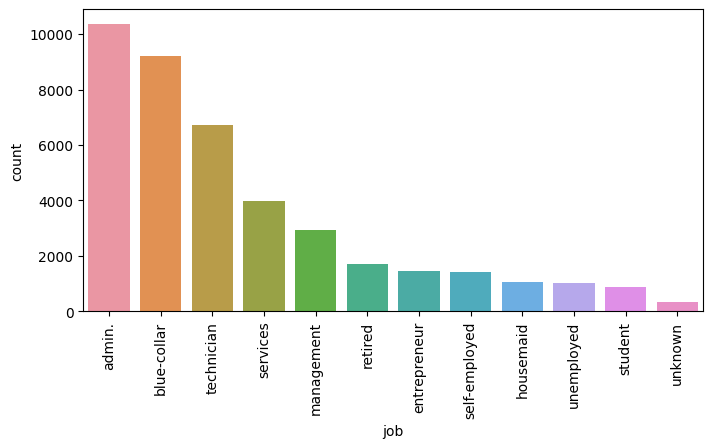

In [131]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df['job'].value_counts().index
#count plot
sns.countplot(data = df, x = 'job', order = order)
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

<AxesSubplot:ylabel='job'>

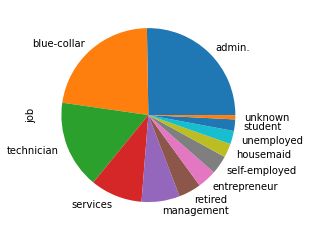

In [132]:
df.job.value_counts().plot(kind='pie')

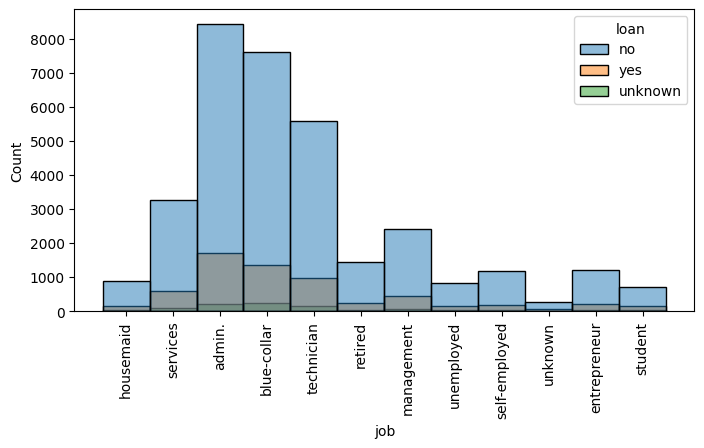

In [133]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'job', bins = 40, hue = 'loan')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [134]:
round(pd.crosstab(df['job'], df['loan'], normalize='index') * 100, 1)

loan,no,unknown,yes
job,,,
admin.,81.4,2.2,16.5
blue-collar,82.6,2.6,14.8
entrepreneur,83.4,2.5,14.1
housemaid,82.7,2.7,14.5
management,82.5,2.4,15.0
retired,83.4,2.6,14.0
self-employed,83.5,2.8,13.7
services,82.3,2.5,15.2
student,81.1,2.6,16.2


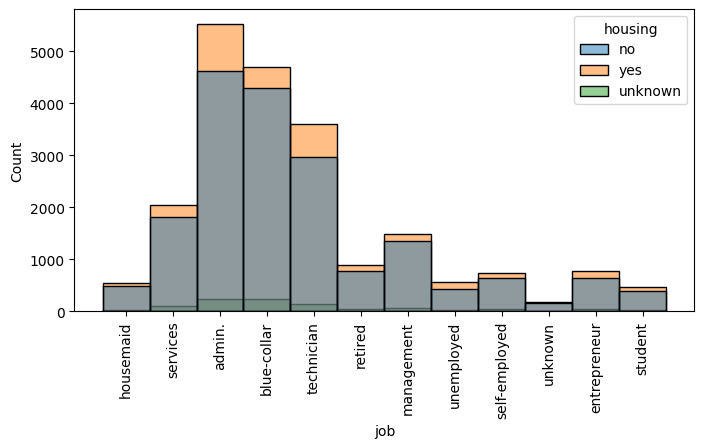

In [135]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'job', bins = 40, hue = 'housing')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [136]:
round(pd.crosstab(df['job'], df['housing'], normalize='index') * 100, 1)

housing,no,unknown,yes
job,,,
admin.,44.5,2.2,53.3
blue-collar,46.5,2.6,50.9
entrepreneur,44.0,2.5,53.5
housemaid,46.3,2.7,50.9
management,46.6,2.4,51.0
retired,45.6,2.6,51.9
self-employed,45.1,2.8,52.1
services,45.8,2.5,51.7
student,43.5,2.6,53.9


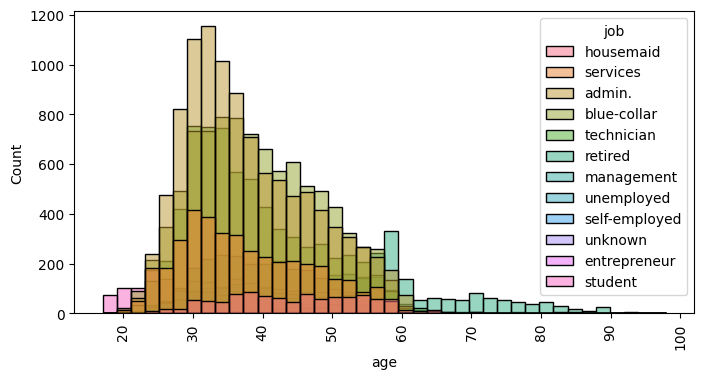

In [137]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, hue = 'job')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

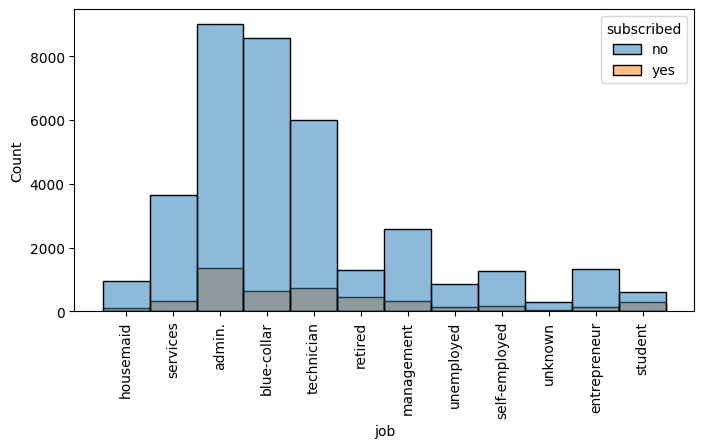

In [138]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'job', bins = 40, hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

<AxesSubplot:title={'center':'duration'}, xlabel='job'>

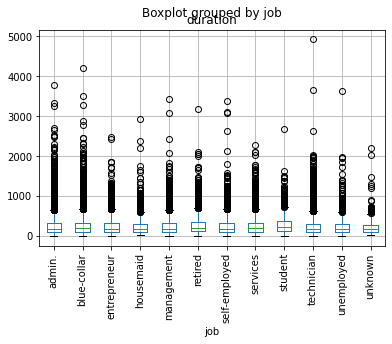

In [139]:
df.boxplot(column="duration", by="job", rot=90)

### Education

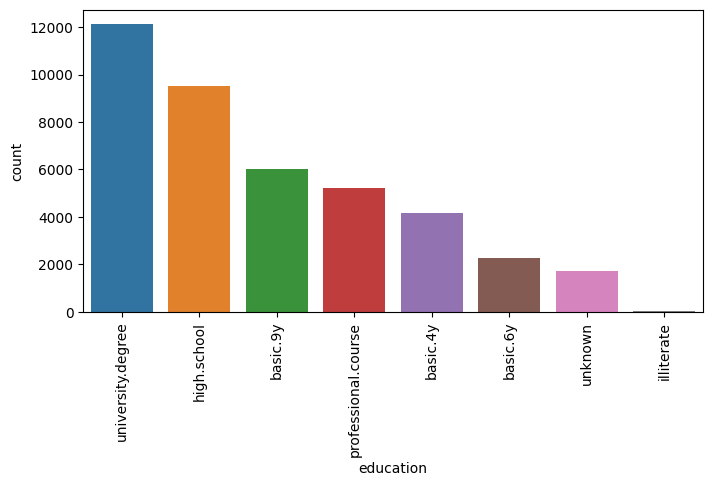

In [140]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df['education'].value_counts().index
#count plot
sns.countplot(data = df, x = 'education', order = order)
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

<AxesSubplot:ylabel='education'>

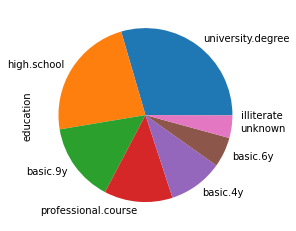

In [141]:
df.education.value_counts().plot(kind='pie')

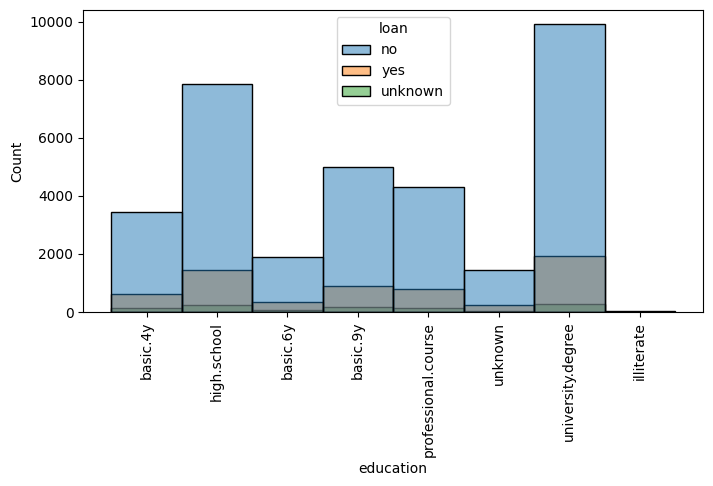

In [142]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'education', bins = 40, hue = 'loan')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [143]:
round(pd.crosstab(df['education'], df['loan'], normalize='index') * 100, 1)

loan,no,unknown,yes
education,,,
basic.4y,82.2,2.8,15.0
basic.6y,83.0,2.6,14.4
basic.9y,82.9,2.5,14.6
high.school,82.5,2.3,15.2
illiterate,83.3,0.0,16.7
professional.course,82.4,2.4,15.2
university.degree,81.8,2.3,15.9
unknown,83.7,2.3,14.0


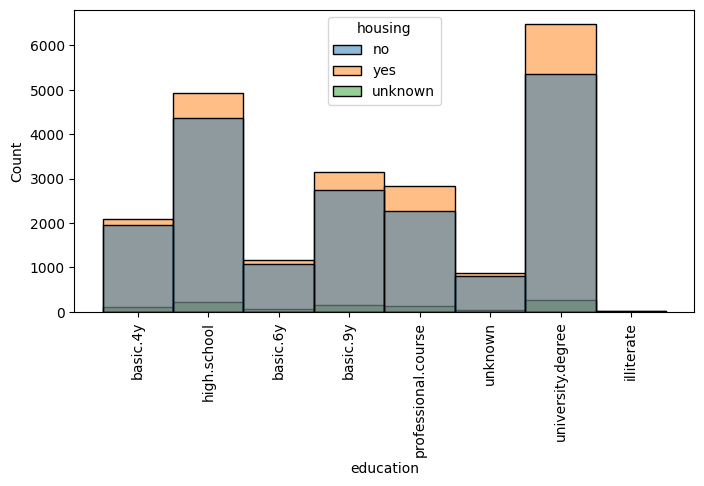

In [144]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'education', bins = 40, hue = 'housing')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [145]:
round(pd.crosstab(df['education'], df['housing'], normalize='index') * 100, 1)

housing,no,unknown,yes
education,,,
basic.4y,46.8,2.8,50.3
basic.6y,46.6,2.6,50.7
basic.9y,45.4,2.5,52.1
high.school,45.9,2.3,51.8
illiterate,44.4,0.0,55.6
professional.course,43.4,2.4,54.2
university.degree,44.3,2.3,53.5
unknown,47.1,2.3,50.6


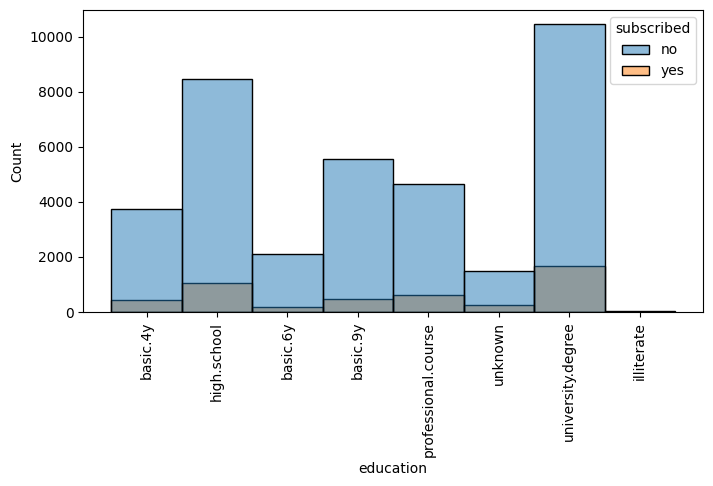

In [146]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'education', bins = 40, hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [147]:
round(pd.crosstab(df['education'], df['subscribed'], normalize='index') * 100, 1)


subscribed,no,yes
education,,
basic.4y,89.8,10.2
basic.6y,91.8,8.2
basic.9y,92.2,7.8
high.school,89.2,10.8
illiterate,77.8,22.2
professional.course,88.6,11.4
university.degree,86.3,13.7
unknown,85.5,14.5


<AxesSubplot:title={'center':'duration'}, xlabel='education'>

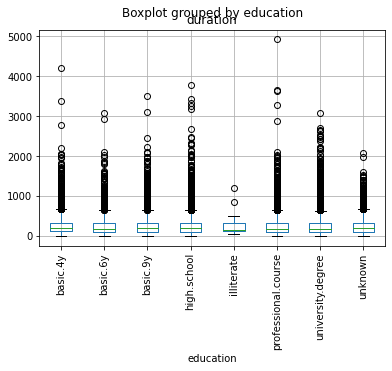

In [148]:
df.boxplot(column="duration", by="education", rot=90)

### Contact

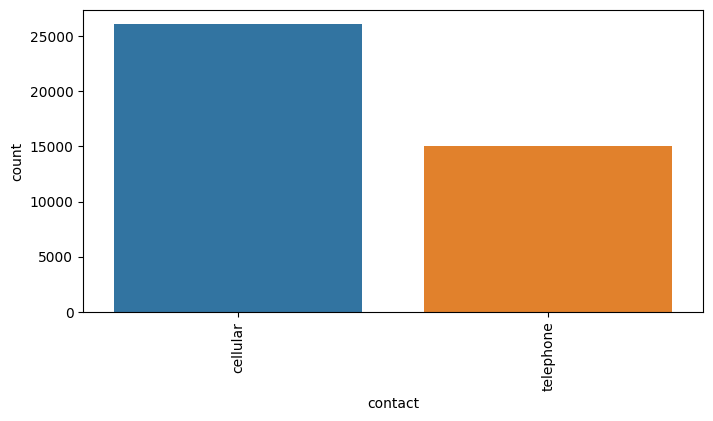

In [149]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = df['contact'].value_counts().index
#count plot
sns.countplot(data = df, x = 'contact', order = order)
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

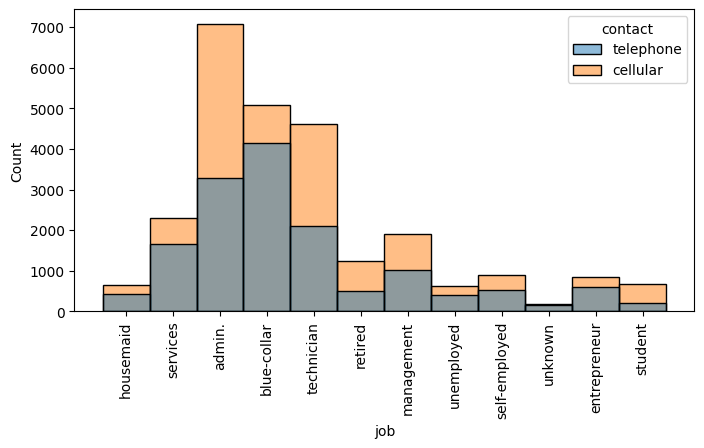

In [150]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'job', bins = 40, hue = 'contact')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

In [151]:
round(pd.crosstab(df['job'], df['contact'], normalize='index') * 100, 1)

contact,cellular,telephone
job,,
admin.,68.3,31.7
blue-collar,55.0,45.0
entrepreneur,58.7,41.3
housemaid,60.4,39.6
management,65.0,35.0
retired,71.6,28.4
self-employed,62.8,37.2
services,58.2,41.8
student,76.7,23.3


### Pdays

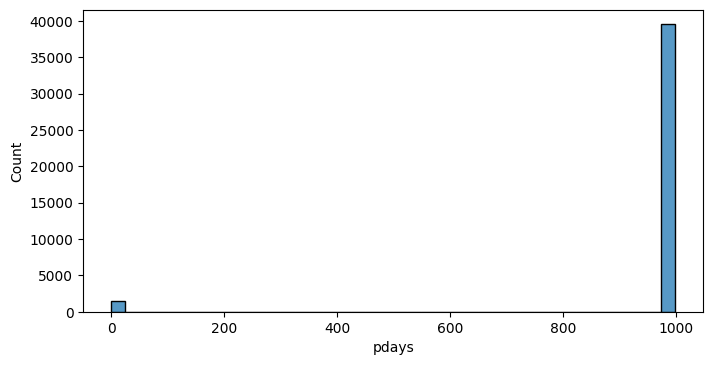

In [152]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'pdays', bins = 40)
#show the figure
plt.show()

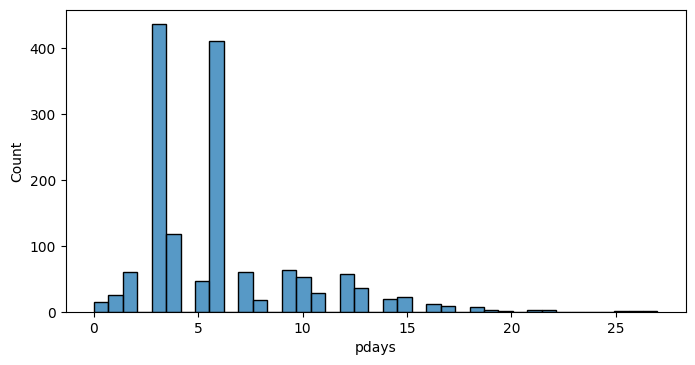

In [153]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#filter the dataframe
data = df[df.pdays != 999]
#plot a histogram
sns.histplot(data = data, x = 'pdays')
#show the figure
plt.show()

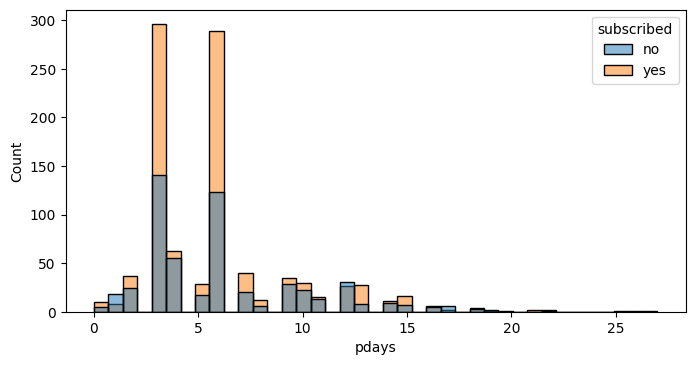

In [154]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#filter the dataframe
data = df[df.pdays != 999]
#plot a histogram
sns.histplot(data = data, x = 'pdays', hue = 'subscribed')
#show the figure
plt.show()

### Age

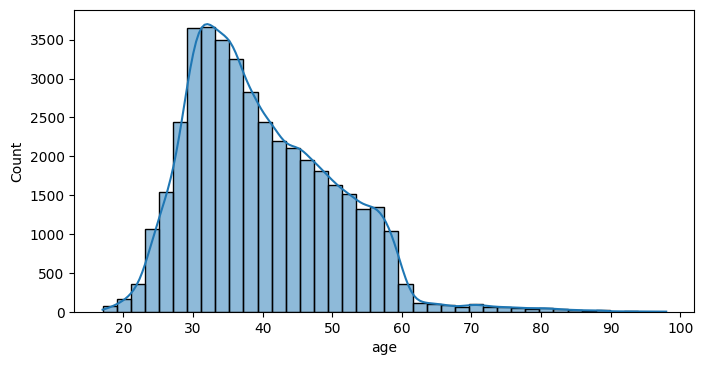

In [155]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, kde = True)
#show the figure
plt.show()

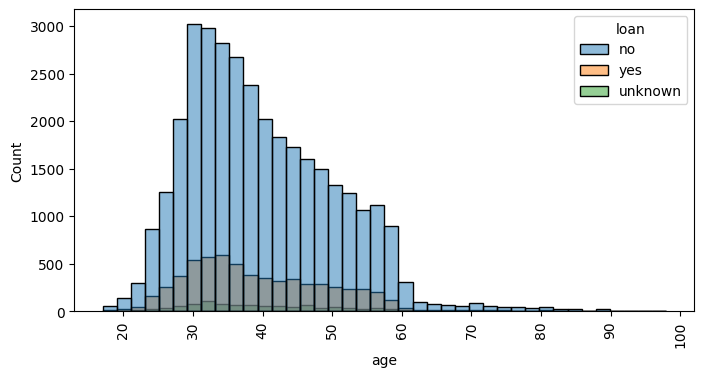

In [156]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, hue = 'loan')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

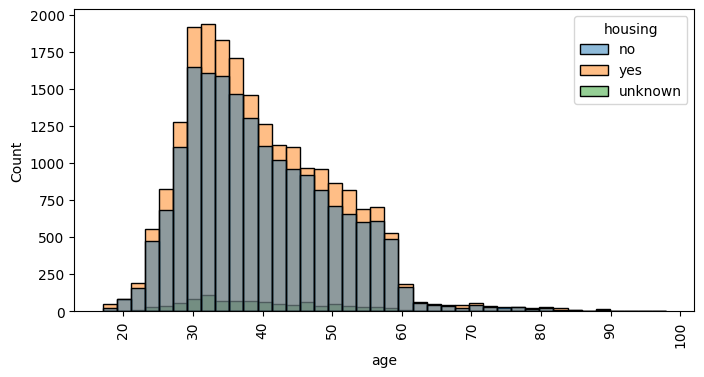

In [157]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, hue = 'housing')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

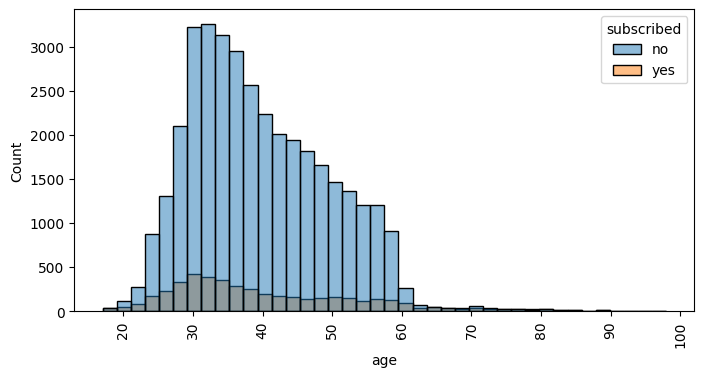

In [158]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, hue = 'subscribed')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

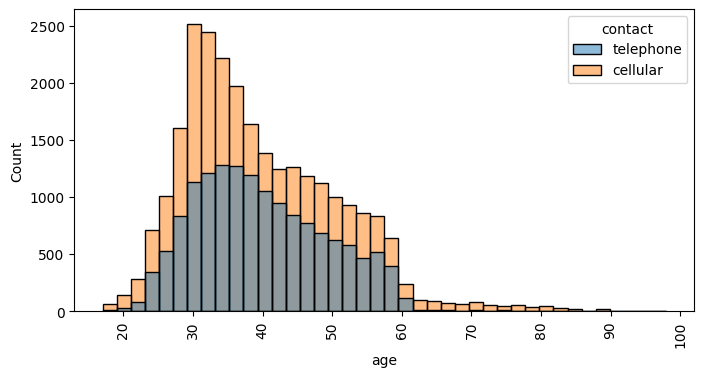

In [159]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100) 
#plot a histogram
sns.histplot(data = df, x = 'age', bins = 40, hue = 'contact')
#rotate xticks 
plt.xticks(rotation = 90)
#show the figure
plt.show()

### Duration

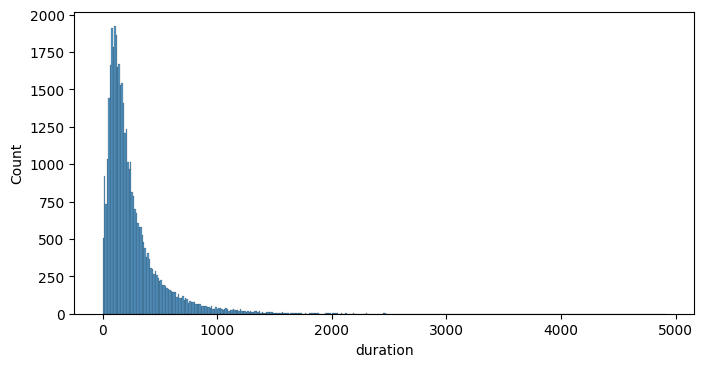

In [160]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df, x = 'duration')
#show the figure
plt.show()

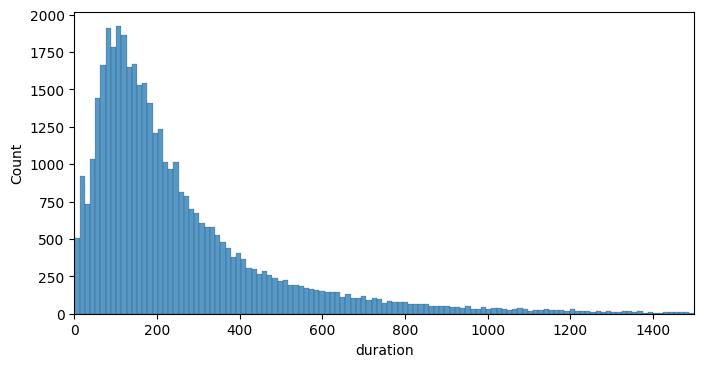

In [161]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df, x = 'duration')
#x limit
plt.xlim(0,1500)
#show the figure
plt.show()

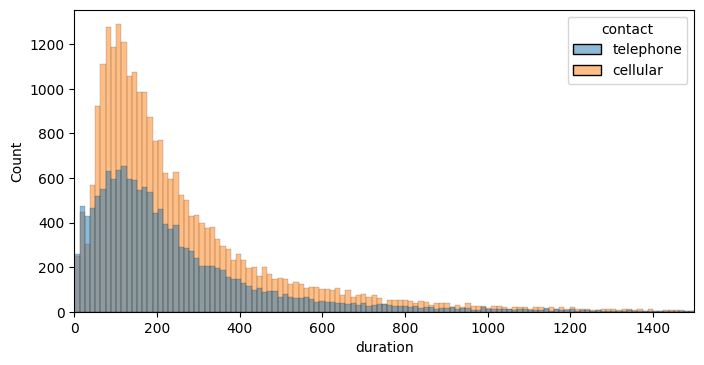

In [162]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df, x = 'duration', hue = 'contact')
#x limit
plt.xlim(0,1500)
#show the figure
plt.show()

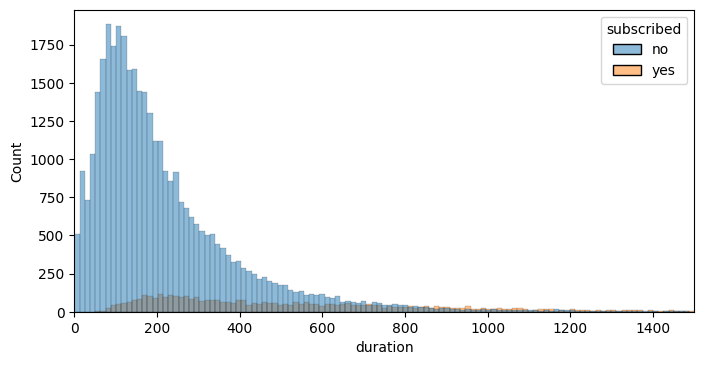

In [163]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#hist plot
sns.histplot(data = df, x = 'duration', hue = 'subscribed')
#x limit
plt.xlim(0,1500)
#show the figure
plt.show()

### Correlation

In [164]:
#get dummies binary
df = pd.get_dummies(df,columns = ['contact','subscribed'], drop_first=True)

#get dummies
df = pd.get_dummies(df, drop_first=False)

In [165]:
df.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,0,1,0
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,0,1,0
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,1,0,0,0,1,0
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,0,1,0
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41084 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41084 non-null  int64  
 1   month                          41084 non-null  int64  
 2   day_of_week                    41084 non-null  int64  
 3   duration                       41084 non-null  int64  
 4   campaign                       41084 non-null  int64  
 5   pdays                          41084 non-null  int64  
 6   previous                       41084 non-null  int64  
 7   emp.var.rate                   41084 non-null  float64
 8   cons.price.idx                 41084 non-null  float64
 9   cons.conf.idx                  41084 non-null  float64
 10  euribor3m                      41084 non-null  float64
 11  nr.employed                    41084 non-null  float64
 12  contact_telephone              41084 non-null 

<AxesSubplot:>

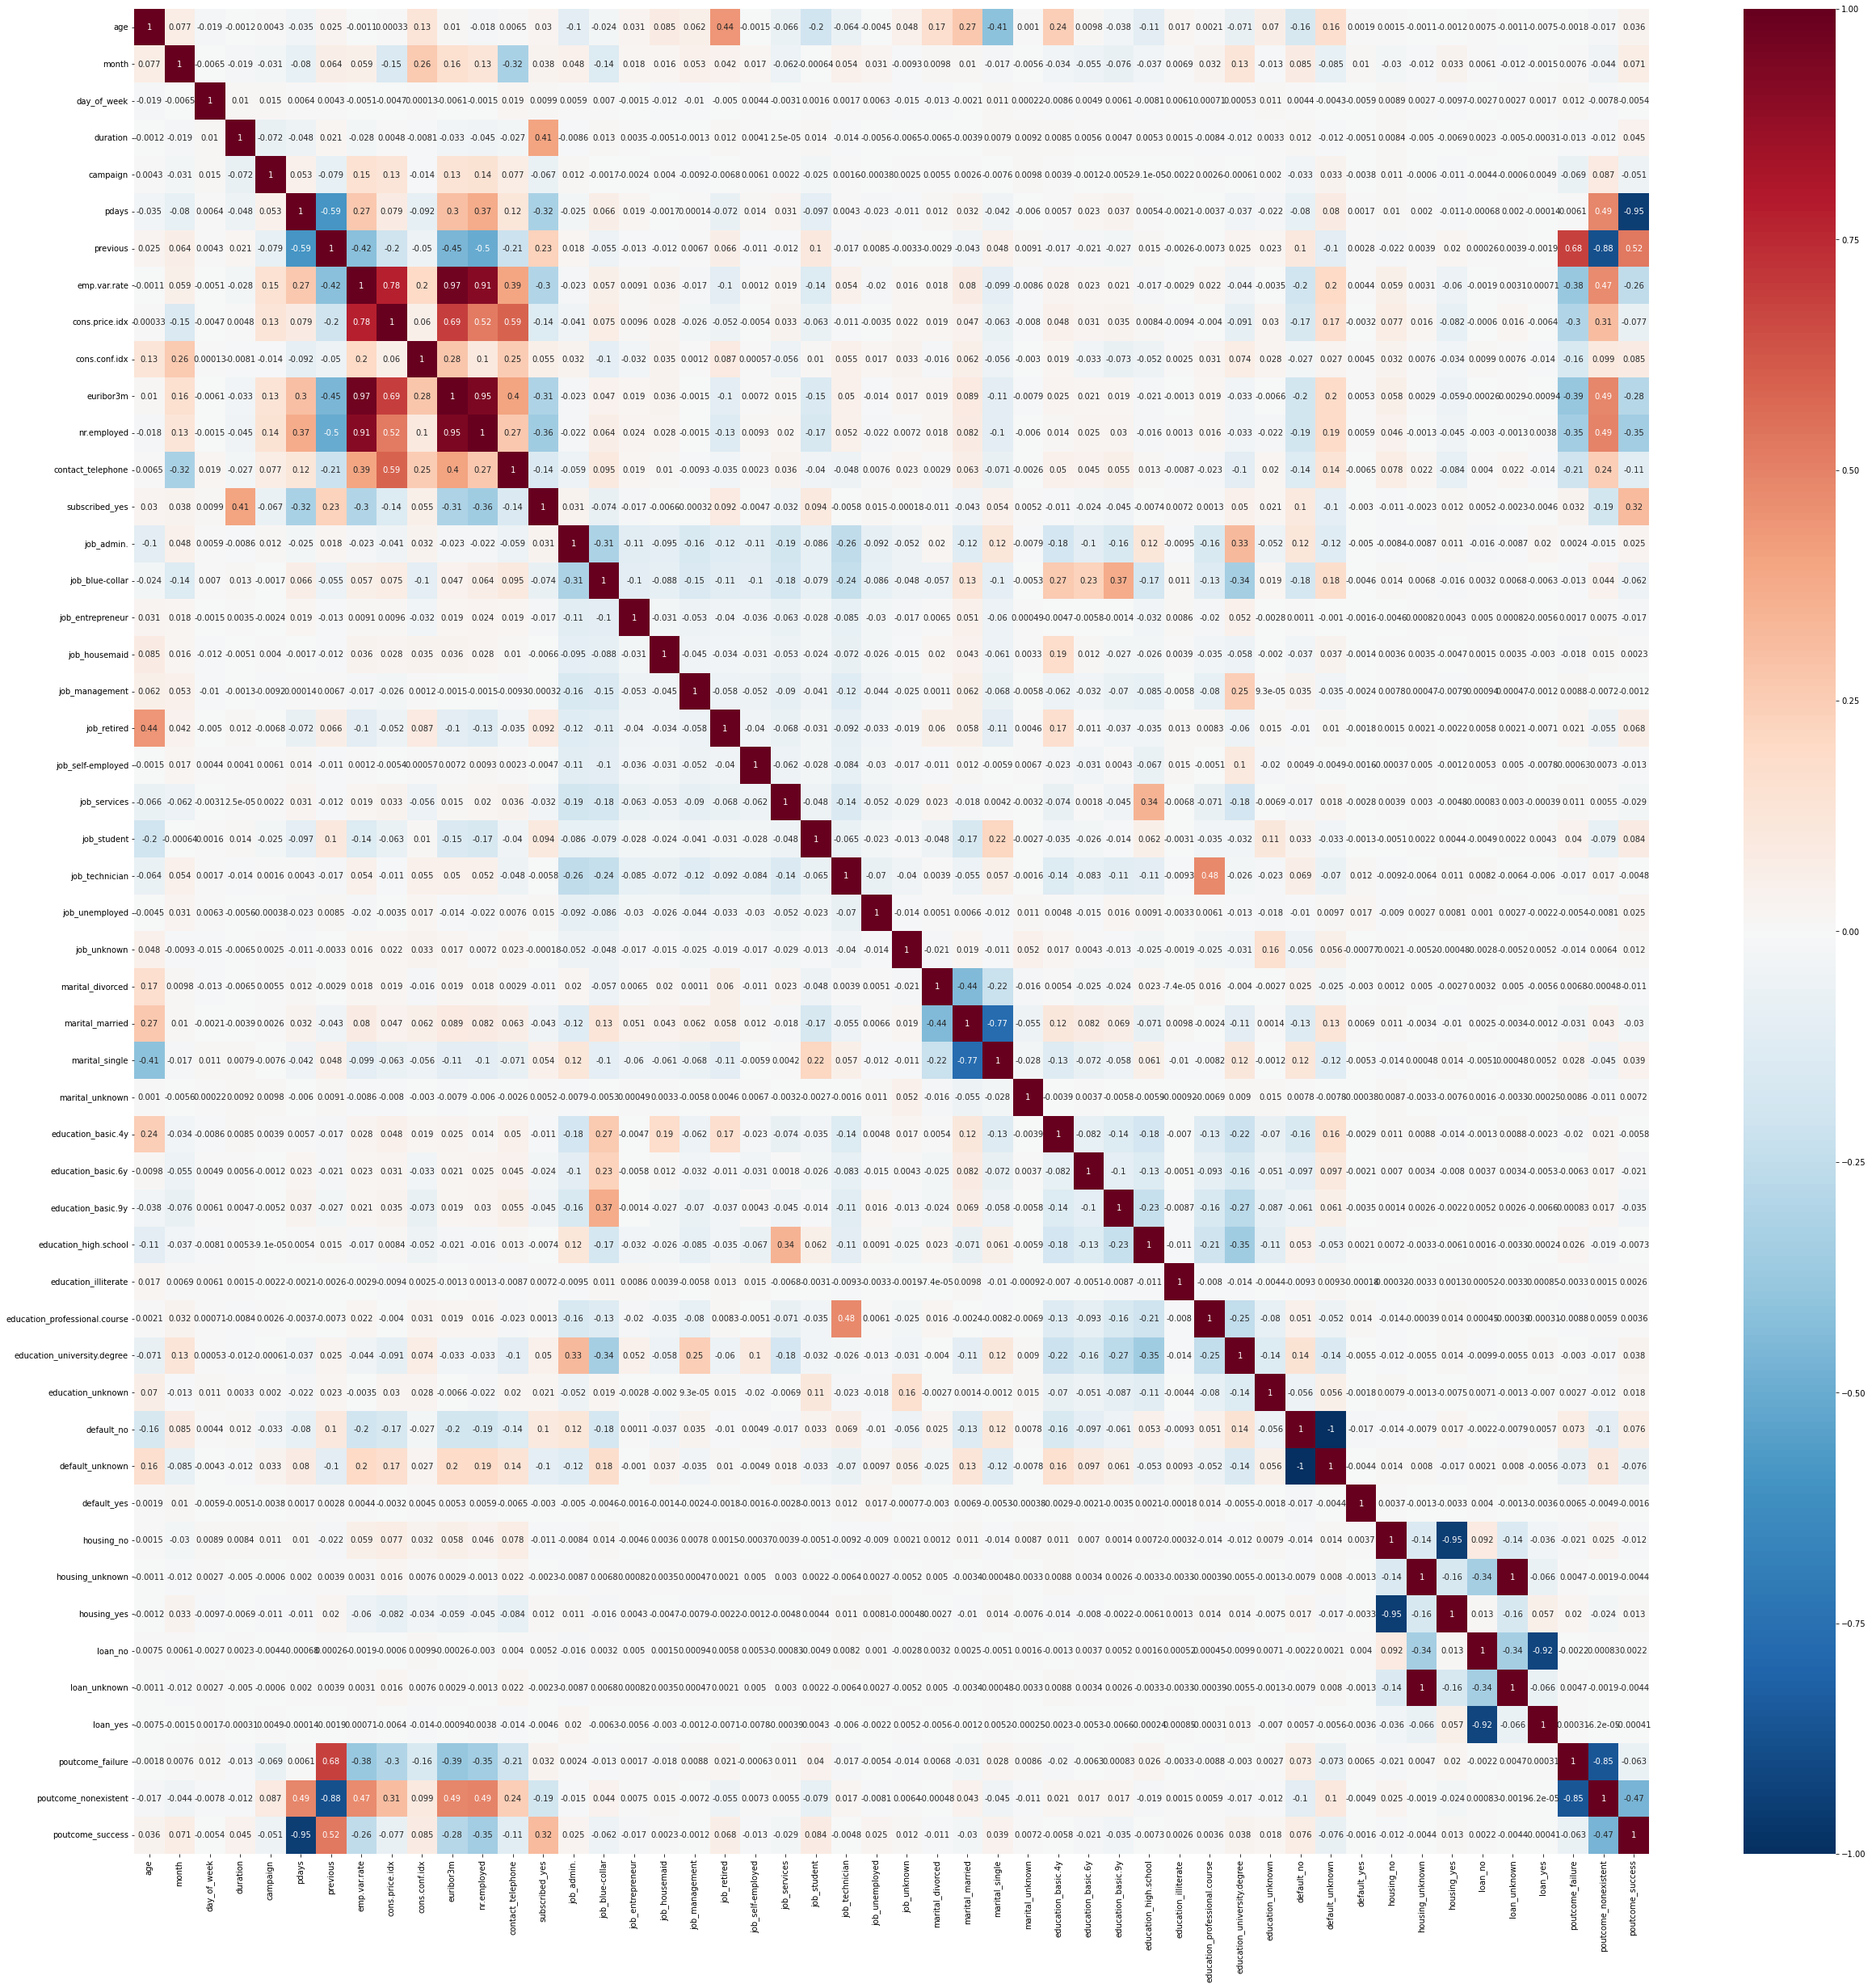

In [170]:
from scipy.stats import spearmanr
from seaborn import heatmap
fig,ax=plt.subplots(figsize=(42,42))
heatmap(df.corr(),
        annot=True,
        vmin=-1,
        vmax=1,
        ax=ax,
        cmap='RdBu_r')

<AxesSubplot:>

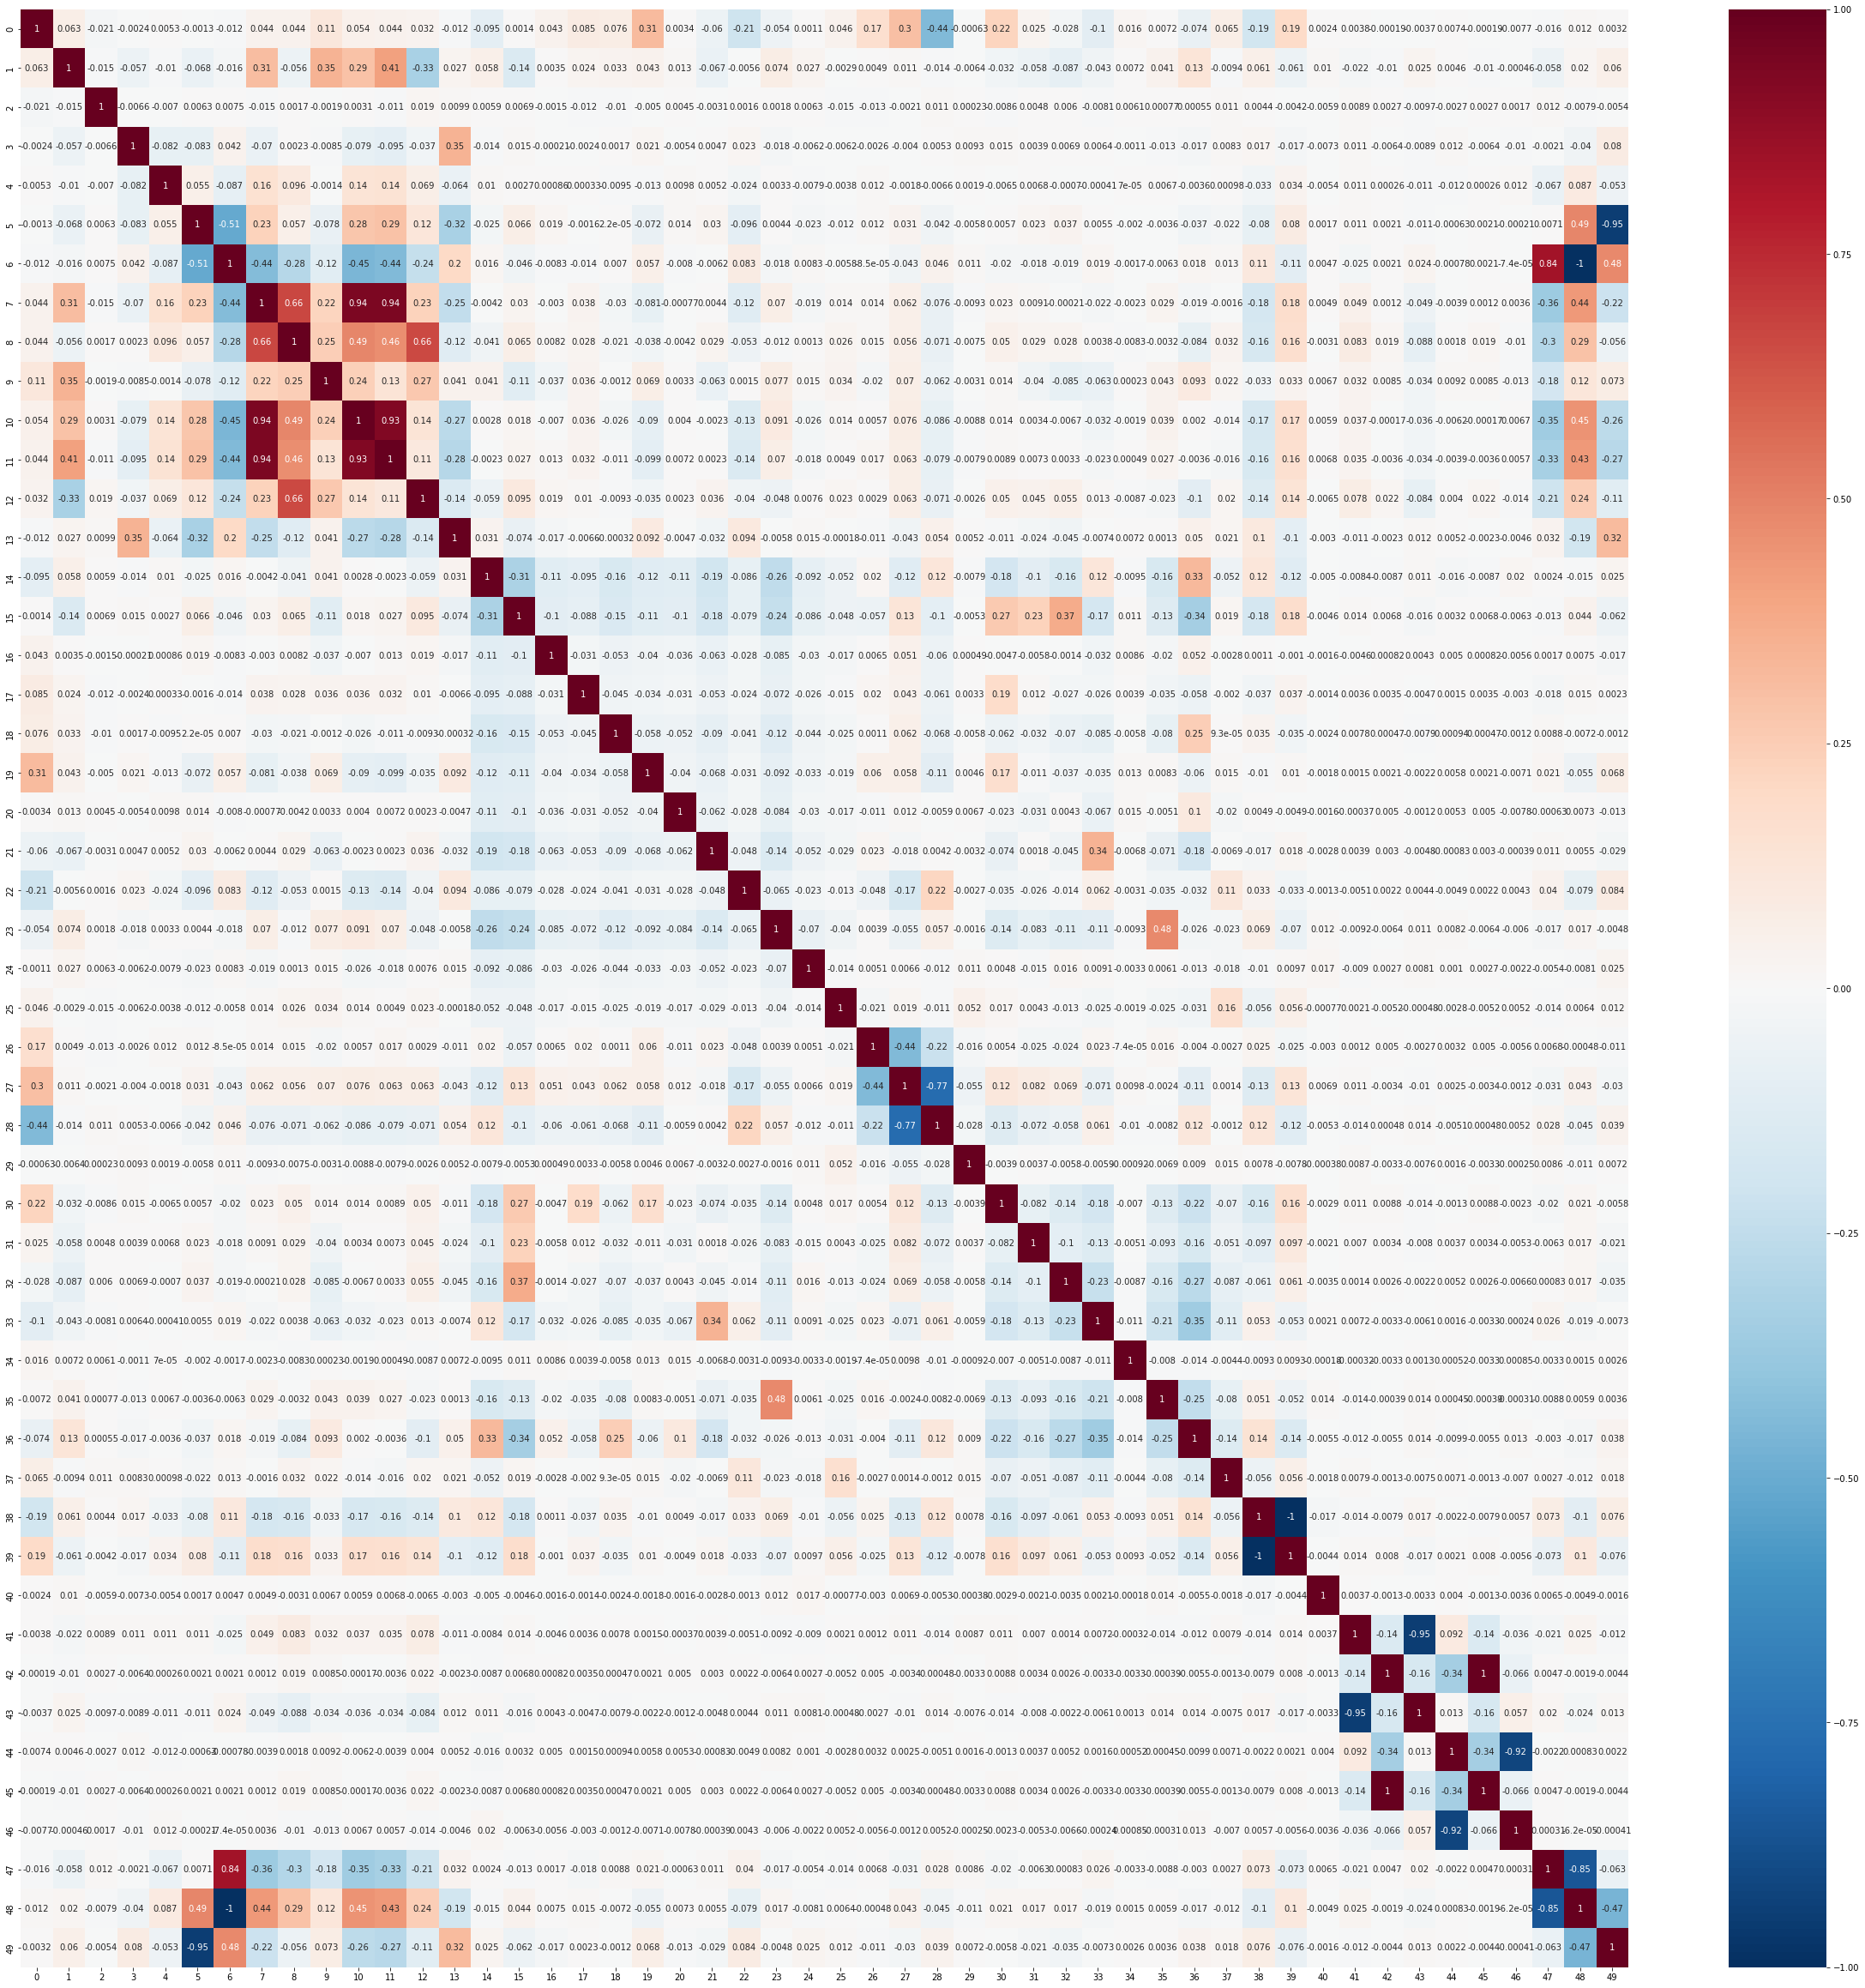

In [171]:
fig,ax=plt.subplots(figsize=(42,42))
heatmap(spearmanr(df)[0],
        annot=True,
        vmin=-1,
        vmax=1,
        ax=ax,
        cmap='RdBu_r')